In [1]:
# !pip install torch===1.7.0 torchvision===0.8.1 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html ### installed

In [2]:
import torch
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Input
from tensorflow.keras import layers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import pickle

In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.9461, 0.6067, 0.5426],
        [0.1707, 0.0212, 0.6713],
        [0.7254, 0.9096, 0.4244],
        [0.4225, 0.4502, 0.4746],
        [0.8423, 0.6495, 0.6285]])


In [4]:
torch.cuda.is_available() # check if gpu driver and cuda are enabled

True

In [5]:
# Data Source
# https://data.world/eia-wind/us-retail-gasoline-prices

In [6]:
df = pd.read_csv('weekly_prices.csv')

In [7]:
df.head(10)

,week_of,dollars_per_gallon
0,2020-10-26,2.234
1,2020-10-19,NaN
2,2020-10-12,2.257
3,2020-10-05,2.262
4,2020-09-28,2.259
5,2020-09-21,2.259
6,2020-09-14,2.274
7,2020-09-07,2.302
8,2020-08-31,2.311
9,2020-08-24,2.272


In [8]:
df = df.dropna()

In [9]:
df['dollars_per_gallon'].isnull().any()

False

In [10]:
df['week_of'] = pd.to_datetime(df['week_of'])

In [11]:
df['day'] = df['week_of'].dt.day
df['month'] = df['week_of'].dt.month
df['year'] = df['week_of'].dt.year

In [12]:
df['day']

0       26
2       12
3        5
4       28
5       21
        ..
1433    10
1434     3
1435    26
1436    19
1437    12
Name: day, Length: 1301, dtype: int64

In [13]:
df

,week_of,dollars_per_gallon,day,month,year
0,2020-10-26,2.234,26,10,2020
2,2020-10-12,2.257,12,10,2020
3,2020-10-05,2.262,5,10,2020
4,2020-09-28,2.259,28,9,2020
5,2020-09-21,2.259,21,9,2020
...,...,...,...,...,...
1433,1993-05-10,1.097,10,5,1993
1434,1993-05-03,1.086,3,5,1993
1435,1993-04-26,1.086,26,4,1993
1436,1993-04-19,1.079,19,4,1993


In [14]:
df.head(20)

,week_of,dollars_per_gallon,day,month,year
0,2020-10-26,2.234,26,10,2020
2,2020-10-12,2.257,12,10,2020
3,2020-10-05,2.262,5,10,2020
4,2020-09-28,2.259,28,9,2020
5,2020-09-21,2.259,21,9,2020
6,2020-09-14,2.274,14,9,2020
7,2020-09-07,2.302,7,9,2020
8,2020-08-31,2.311,31,8,2020
9,2020-08-24,2.272,24,8,2020
10,2020-08-17,2.256,17,8,2020


In [15]:
df.dtypes

week_of               datetime64[ns]
dollars_per_gallon           float64
day                            int64
month                          int64
year                           int64
dtype: object

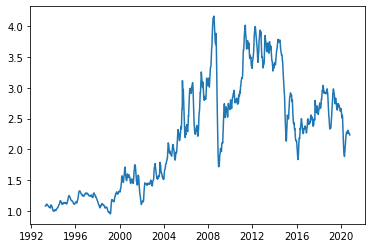

In [16]:
plt.plot(df['week_of'], df['dollars_per_gallon']);

In [22]:
df = df.drop(columns='week_of')

In [23]:
features = list(df.loc[:, df.columns])

X = df[features].values
y = df['dollars_per_gallon']

In [24]:
X.shape

(1301, 4)

In [25]:
y.shape

(1301,)

In [28]:
X

array([[2.234e+00, 2.600e+01, 1.000e+01, 2.020e+03],
       [2.257e+00, 1.200e+01, 1.000e+01, 2.020e+03],
       [2.262e+00, 5.000e+00, 1.000e+01, 2.020e+03],
       ...,
       [1.086e+00, 2.600e+01, 4.000e+00, 1.993e+03],
       [1.079e+00, 1.900e+01, 4.000e+00, 1.993e+03],
       [1.079e+00, 1.200e+01, 4.000e+00, 1.993e+03]])

In [29]:
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X.shape

(1301, 4)

In [30]:
y

0       2.234
2       2.257
3       2.262
4       2.259
5       2.259
        ...  
1433    1.097
1434    1.086
1435    1.086
1436    1.079
1437    1.079
Name: dollars_per_gallon, Length: 1301, dtype: float64

In [31]:
X.shape

(1301, 4)

In [32]:
y.shape

(1301,)

In [60]:
Adam = tf.keras.optimizers.Adam()

In [61]:
model = Sequential()

model.add(Input(4))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2350, activation='softmax'))

model.compile(loss='mse',
              optimizer= Adam, 
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_45 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_47 (Dense)             (None, 2350)              603950    
Total params: 645,614
Trainable params: 645,614
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X,y, epochs=25);

Epoch 1/25
41/41 [==============================] - 0s 3ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 2/25
41/41 [==============================] - 0s 3ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 3/25
41/41 [==============================] - 0s 2ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 4/25
41/41 [==============================] - 0s 3ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 5/25
41/41 [==============================] - 0s 2ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 6/25
41/41 [==============================] - 0s 2ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 7/25
41/41 [==============================] - 0s 2ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 8/25
41/41 [==============================] - 0s 3ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 9/25
41/41 [==============================] - 0s 2ms/step - loss: 5.6531 - accuracy: 0.0000e+00
Epoch 10/25
41/41 [==============================] - 0s 2ms/step - loss: 5.6531 - 